/home/pas/Pprog/simulazionetesi/final/funz.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  else:
/home/pas/Pprog/simulazionetesi/final/funz.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  x = np.arange(filtri.na[0], filtri.na[1], 1)
/home/pas/Pprog/simulazionetesi/final/funz.py:42: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  e_f = interp1d(emi.lambd, emi.e/int_norm, bounds_error=False, fill_value=0)


Numero totale dei raggi 27371 
Numero di intersezioni con rivelatori di trigger:  1949 
Numero di intersezioni con rivelatori di misura:  731 
Intersezioni trigger/raggi tot 7.120675167147711 % 
Measure/raggi tot 2.670709875415586 % 
Accettanza geometrica 37.5064135454079 %
UP-DOWN :  75.37619699042408 %
DOWN-L1 :  0.0 %
DOWN-L2 :  0.0 %
DOWN-L3 :  3.283173734610123 %
DOWN-L4 :  3.283173734610123 %
UP-L1 :  0.0 %
UP-L2 :  0.0 %
UP-L3 :  8.344733242134064 %
UP-L4 :  9.712722298221614 %
L1-L2 :  0.0 %
L1-L3:  :  0.0 %
L1-L4:  :  0.0 %
L2-L3 :  0.0 %
L2-L4 :  0.0 %
L3-L4 :  0.0 %
0.2840595717936601 0.2840595717936601
0.2840595717936601 0.4205624349769681
0.2840595717936601 0.4205624349769681
vecchio preamp 
Il numero di fotoni corrispondente è:  880 
media  442.2731177305634
# fotoni dai quali siamo sicuri di distinguere i Fotoni cherenkov  437.7268822694366
chere med:  10.873754418311847
p - value:  0.18057455540355677
filtro nuovo preamp 
Il numero di fotoni corrispondente è:  8 
media 

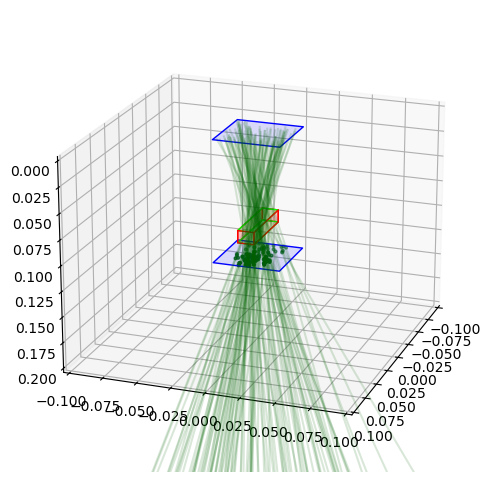

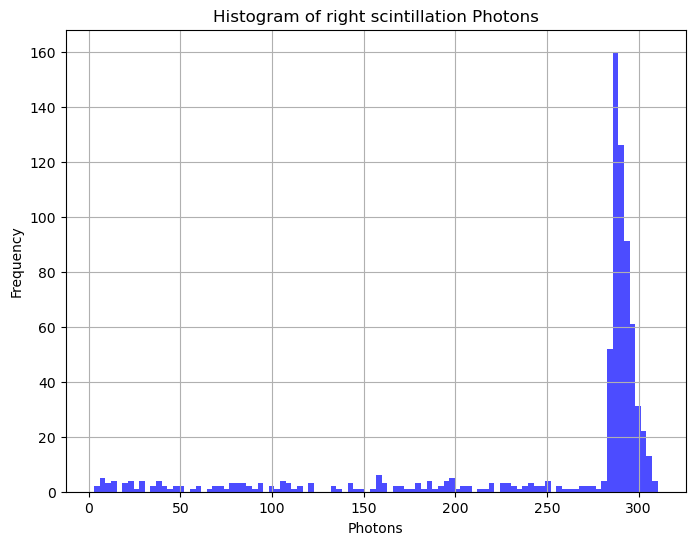

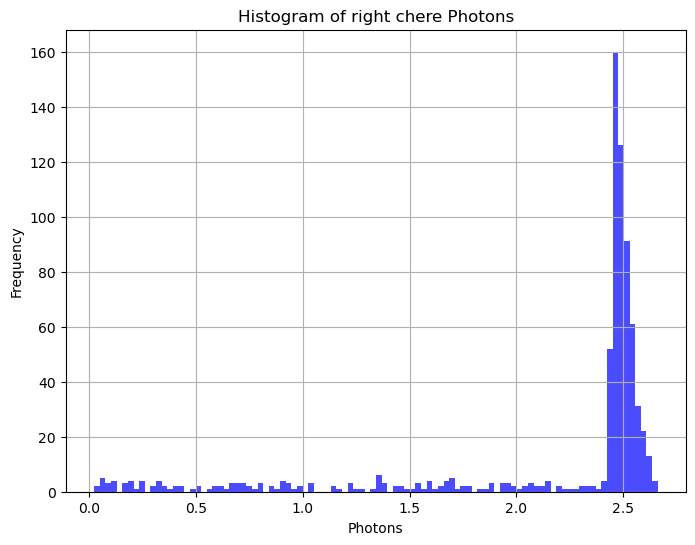

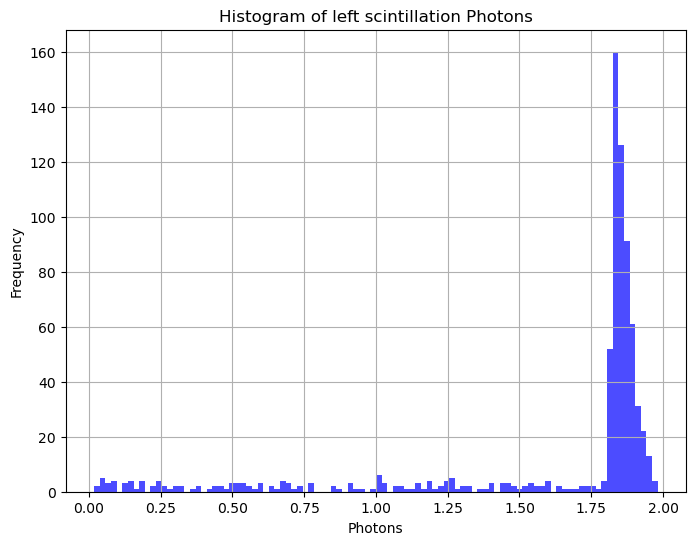

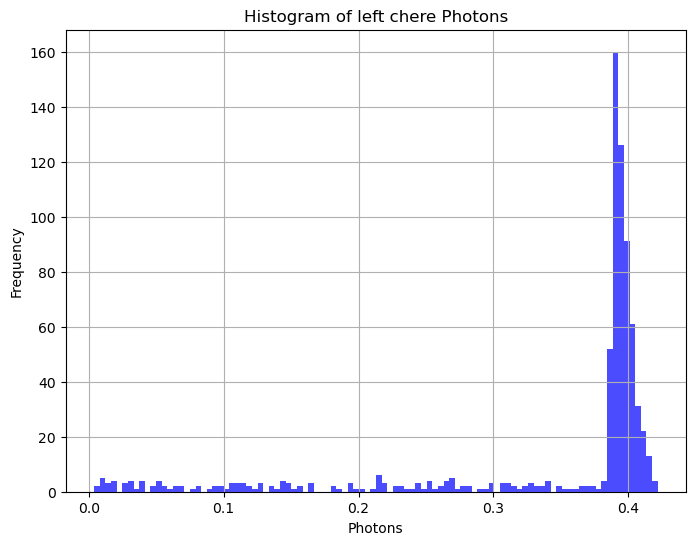

449

Warning in <TFile::Append>: Replacing existing TH1: hscintB (Potential memory leak).


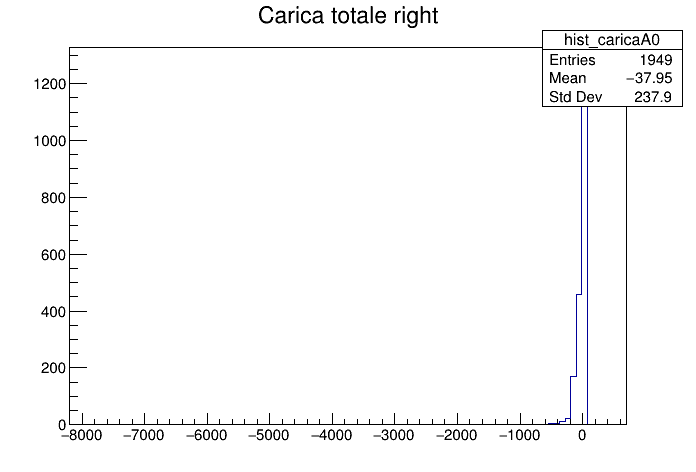

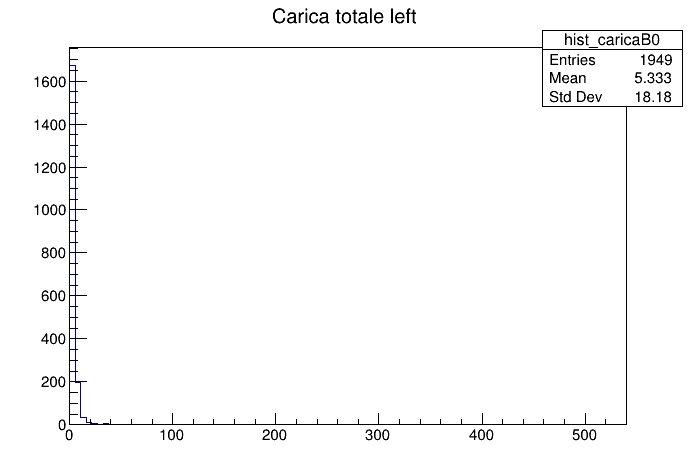

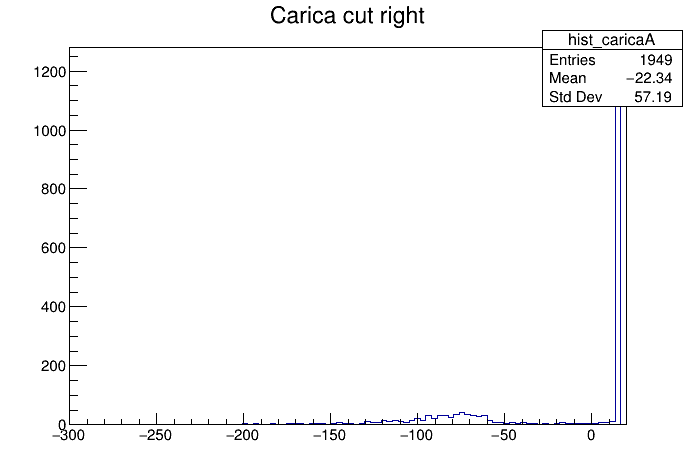

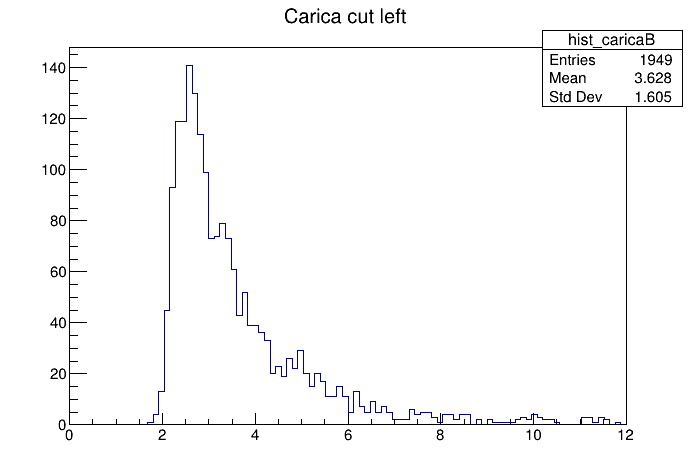

In [7]:
import ROOT
simul = ROOT.TFile.Open("vsesperi/simul.root", "RECREATE")

import Classe
import funz

import importlib
importlib.reload(Classe)
importlib.reload(funz)

#Scegli sipm
sipm = Classe.sipm('dati/sipm/S14460_pde.csv', 0.0625, 1.57, 200, 900, 'dati/sipm/S14460_pde.csv', 0.0625, 1.57, 200, 900)

#Scegli filtri
filtri = Classe.filtri('dati/filtri/UG1.asc', 'dati/filtri/UG1.asc',)
#filtri = Classe.filtri('dati/filtri/UG1.asc', [200, 900])

#Scegli tempo, apparato e scintillatore
time = 20
sistema = Classe.sys4
scintillatore = Classe.BGO

#Run
muon_df=funz.run(sistema, scintillatore, sipm, filtri, time)

A0, B0, A, B = muon_df
simul.WriteObject(A0, "A0")
simul.WriteObject(A, "A")
simul.WriteObject(B0, "B0")
simul.WriteObject(B, "B")